In [248]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (20.0, 8.0)

# copied from Raphael, he does it in one for loop, i managed in 3 functions!!!! 
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
df = None
for i,day in enumerate(days):
    new_df = pd.read_csv(f'../data/{day}.csv', sep=';')
    new_df['timestamp'] = pd.to_datetime(new_df['timestamp'], format="%Y-%m-%d %H:%M:%S")
    new_df['customer_no'] = day + '_' + new_df['customer_no'].astype(str)
    if i == 0:
        df = new_df
    else:
        df = pd.concat((df,new_df))

In [211]:
def read_file(url):
    '''this function is to read file from local path.'''
    with open(url) as f:
        df = pd.read_csv(url,decimal=';')
        df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('___','').str.replace('_','')
        df[['timestamp', 'customerno','location']]= df['timestamp;customerno;location'].str.split(';',expand=True)
        df.drop('timestamp;customerno;location',axis=1,inplace=True)
        df['timestamp']=pd.to_datetime(df['timestamp'])
        df['day'] = df.iloc[:,0].dt.day
        df['hour'] = df.iloc[:,0].dt.hour
        df['time'] = df.iloc[:,0].dt.time
    return df

def change_cuatomer_id(day,X):
    '''change id of customers, in order to concat all days into one dataframe '''
    new_customerno=[]
    for i in X:
        new_customerno.append('%s_%s'%(day,i))
    return new_customerno

In [212]:
#get files
df_mon=read_file('../data/monday.csv')
df_tue=read_file('../data/tuesday.csv')
df_wed=read_file('../data/wednesday.csv')
df_thur=read_file('../data/thursday.csv')
df_fri=read_file('../data/friday.csv')

<ipython-input-211-bccc6213377e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('___','').str.replace('_','')


In [213]:
# mon
day = 'mon'
X = [i for i in list(df_mon['customerno'])]
df_mon['customerno']=change_cuatomer_id(day,X)
# tue
day = 'tue'
X = [i for i in list(df_tue['customerno'])]
df_tue['customerno']=change_cuatomer_id(day,X)
#wed 
day = 'wed'
X = [i for i in list(df_wed['customerno'])]
df_wed['customerno']=change_cuatomer_id(day,X)
#thur
day = 'thur'
X = [i for i in list(df_thur['customerno'])]
df_thur['customerno']=change_cuatomer_id(day,X)
#fri
day = 'fri'
X = [i for i in list(df_fri['customerno'])]
df_fri['customerno']=change_cuatomer_id(day,X)

In [214]:
# check info and isnull
df_mon.info(), df_tue.info(), df_wed.info(), df_thur.info(), df_fri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   4884 non-null   datetime64[ns]
 1   customerno  4884 non-null   object        
 2   location    4884 non-null   object        
 3   day         4884 non-null   int64         
 4   hour        4884 non-null   int64         
 5   time        4884 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 229.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714 entries, 0 to 4713
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   4714 non-null   datetime64[ns]
 1   customerno  4714 non-null   object        
 2   location    4714 non-null   object        
 3   day         4714 non-null   int64         
 4   hour        4714 non-null   int64       

(None, None, None, None, None)

<AxesSubplot:>

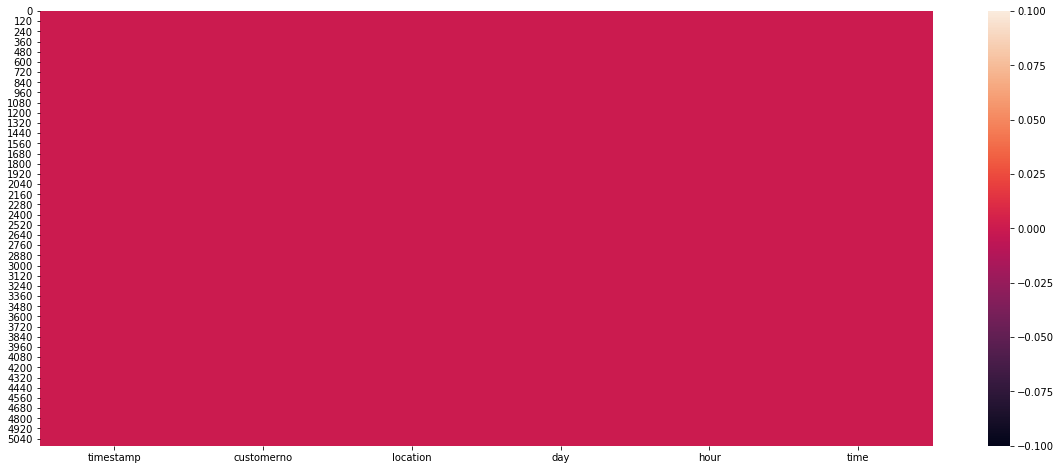

In [215]:
sns.heatmap(df_mon.isnull(), cbar=False)
sns.heatmap(df_tue.isnull(), cbar = False)
sns.heatmap(df_wed.isnull(),cbar = False)
sns.heatmap(df_thur.isnull(),cbar = False)
sns.heatmap(df_fri.isnull())

- Calculate the total number of customers in each section

- Calculate the total number of customers in each section over time

- Display the number of customers at checkout over time

- Calculate the time each customer spent in the market

- Calculate the total number of customers in the supermarket over time.

- Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [216]:
#take a look into monday

- Calculate the total number of customers in each section

In [217]:
df_mon_g=df_mon.groupby(['location'])['customerno'].value_counts().unstack()# intresting, looks like one hot encode

In [218]:
df_mon_g.fillna(0, inplace=True)

In [219]:
df_mon_g['sum']=df_mon_g.sum(axis=1)

<AxesSubplot:xlabel='location'>

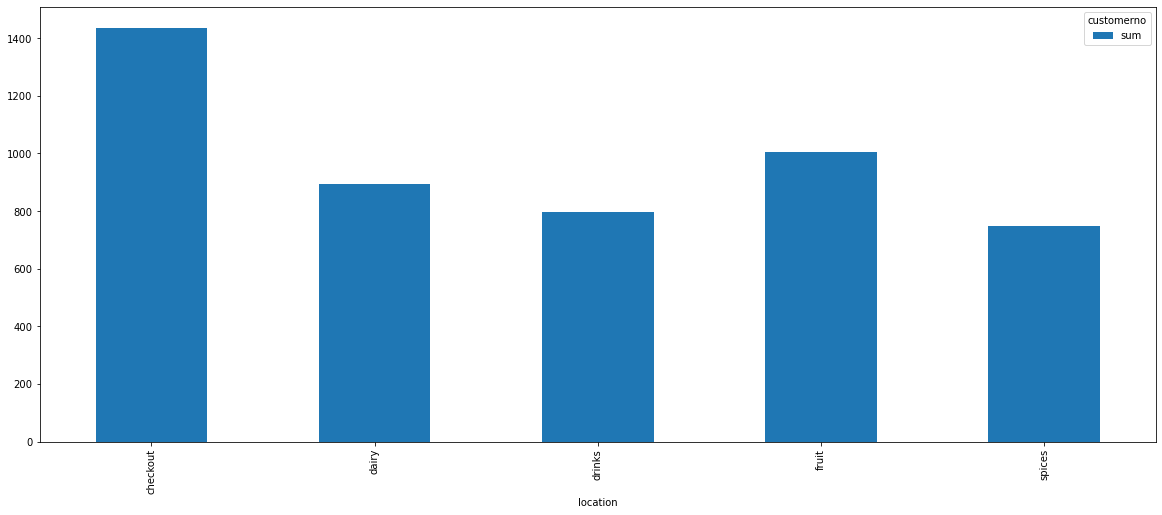

In [220]:
df_mon_g[['sum']].plot(kind='bar')

- Calculate the total number of customers in each section over time

In [221]:
df_mon.head()

,timestamp,customerno,location,day,hour,time
0,2019-09-02 07:03:00,mon_1,dairy,2,7,07:03:00
1,2019-09-02 07:03:00,mon_2,dairy,2,7,07:03:00
2,2019-09-02 07:04:00,mon_3,dairy,2,7,07:04:00
3,2019-09-02 07:04:00,mon_4,dairy,2,7,07:04:00
4,2019-09-02 07:04:00,mon_5,spices,2,7,07:04:00


In [222]:
df_mon_g2=df_mon.groupby(['location','timestamp'])['customerno'].count().unstack().fillna(0)

In [223]:
df_mon_g2.head(5)
# bin, cut into hour, cross_tab

timestamp,2019-09-02 07:03:00,2019-09-02 07:04:00,2019-09-02 07:05:00,2019-09-02 07:06:00,2019-09-02 07:07:00,2019-09-02 07:08:00,2019-09-02 07:09:00,2019-09-02 07:10:00,2019-09-02 07:11:00,2019-09-02 07:12:00,...,2019-09-02 21:40:00,2019-09-02 21:41:00,2019-09-02 21:42:00,2019-09-02 21:43:00,2019-09-02 21:44:00,2019-09-02 21:46:00,2019-09-02 21:47:00,2019-09-02 21:48:00,2019-09-02 21:49:00,2019-09-02 21:50:00
location,,,,,,,,,,,,,,,,,,,,,
checkout,0.0,0.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0
dairy,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0
drinks,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0
fruit,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,...,1.0,0.0,1.0,3.0,0.0,1.0,2.0,0.0,2.0,1.0
spices,0.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0


In [16]:
df_mon_g2['sum']=df_mon_g2.sum(axis=1)

In [17]:
df_mon_g2.head(5)

timestamp,2019-09-02 07:03:00,2019-09-02 07:04:00,2019-09-02 07:05:00,2019-09-02 07:06:00,2019-09-02 07:07:00,2019-09-02 07:08:00,2019-09-02 07:09:00,2019-09-02 07:10:00,2019-09-02 07:11:00,2019-09-02 07:12:00,...,2019-09-02 21:41:00,2019-09-02 21:42:00,2019-09-02 21:43:00,2019-09-02 21:44:00,2019-09-02 21:46:00,2019-09-02 21:47:00,2019-09-02 21:48:00,2019-09-02 21:49:00,2019-09-02 21:50:00,sum
location,,,,,,,,,,,,,,,,,,,,,
checkout,0.0,0.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0,1437.0
dairy,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,895.0
drinks,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,797.0
fruit,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,...,0.0,1.0,3.0,0.0,1.0,2.0,0.0,2.0,1.0,1005.0
spices,0.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,750.0


In [18]:
df_mon_g2_T=df_mon_g2.T

<AxesSubplot:xlabel='timestamp'>

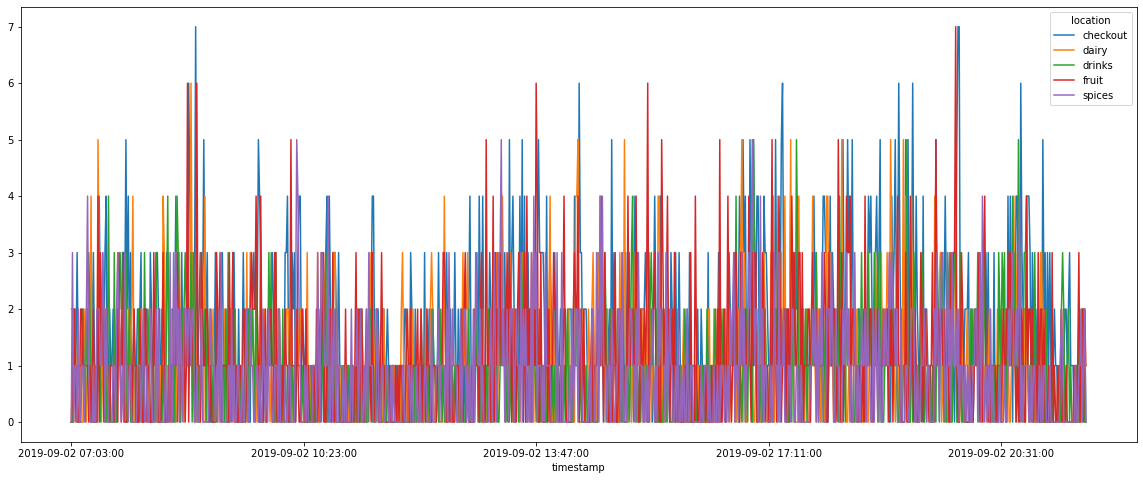

In [19]:
df_mon_g2_T.drop('sum',axis=0).plot()

- Display the number of customers at checkout over time

<AxesSubplot:xlabel='timestamp'>

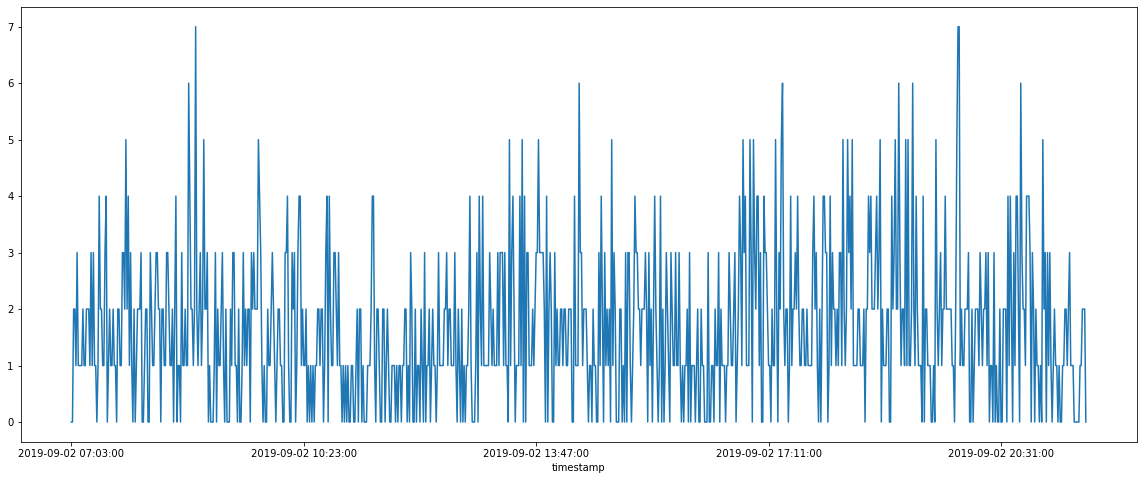

In [20]:
df_mon_g2_T.drop('sum',axis=0)['checkout'].plot()

- Calculate the time each customer spent in the market

In [21]:
import time

In [22]:
df_mon.head(5)

,timestamp,customerno,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [23]:
df_mon_g3=df_mon.groupby(['timestamp'])['customerno'].value_counts().unstack()

In [24]:
df_mon_g3['1']

timestamp
2019-09-02 07:03:00    1.0
2019-09-02 07:04:00    NaN
2019-09-02 07:05:00    1.0
2019-09-02 07:06:00    NaN
2019-09-02 07:07:00    NaN
                      ... 
2019-09-02 21:46:00    NaN
2019-09-02 21:47:00    NaN
2019-09-02 21:48:00    NaN
2019-09-02 21:49:00    NaN
2019-09-02 21:50:00    NaN
Name: 1, Length: 874, dtype: float64

In [25]:
df_mon_g3.index

Index(['2019-09-02 07:03:00', '2019-09-02 07:04:00', '2019-09-02 07:05:00',
       '2019-09-02 07:06:00', '2019-09-02 07:07:00', '2019-09-02 07:08:00',
       '2019-09-02 07:09:00', '2019-09-02 07:10:00', '2019-09-02 07:11:00',
       '2019-09-02 07:12:00',
       ...
       '2019-09-02 21:40:00', '2019-09-02 21:41:00', '2019-09-02 21:42:00',
       '2019-09-02 21:43:00', '2019-09-02 21:44:00', '2019-09-02 21:46:00',
       '2019-09-02 21:47:00', '2019-09-02 21:48:00', '2019-09-02 21:49:00',
       '2019-09-02 21:50:00'],
      dtype='object', name='timestamp', length=874)

section

revenue per minute

fruit

4€

spices

3€

dairy

5€

drinks

6€

In [27]:
# pd.crosstab(df['after'], df['before'], normalize=0)

In [61]:
#df_mon.groupby(['location','timestamp'])['customerno'].value_counts().unstack()

In [32]:
df_mon['location'].unique(), df_mon['customerno'].unique()

(array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object),
 array(['1', '2', '3', ..., '1445', '1446', '1447'], dtype=object))

In [37]:
#df_customers.columns=['dairy', 'spices', 'fruit', 'checkout', 'drinks']
#df_customers.index = df_mon['customerno'].unique()
df_customers = pd.DataFrame({'customerno':df_mon['customerno'].unique()})

In [39]:
df_customers.head(5)

,customerno
0,1
1,2
2,3
3,4
4,5


# calculate transition rate

In [111]:
#df_mon['next_location'] = None

In [112]:
df_mon.sort_values(by=['timestamp','customerno'], inplace=True)

In [113]:
df_mon.head(5)

,timestamp,customerno,location,next_location
0,2019-09-02 07:03:00,1,dairy,None
1,2019-09-02 07:03:00,2,dairy,None
2,2019-09-02 07:04:00,3,dairy,None
3,2019-09-02 07:04:00,4,dairy,None
4,2019-09-02 07:04:00,5,spices,None


In [114]:
df_mon.loc[df_mon['customerno']=='103',:]#.shift(-1)

,timestamp,customerno,location,next_location
328,2019-09-02 08:02:00,103,dairy,None
338,2019-09-02 08:04:00,103,drinks,None
341,2019-09-02 08:05:00,103,spices,None
345,2019-09-02 08:06:00,103,drinks,None
358,2019-09-02 08:08:00,103,checkout,None


In [118]:
df_mon.loc[df_mon['customerno']=='103',:]['location'].shift(-1)

328      drinks
338      spices
341      drinks
345    checkout
358         NaN
Name: location, dtype: object

In [120]:
customerid = df_mon['customerno'].unique()

In [127]:
for customer in customerid:
    df_mon.loc[df_mon['customerno']== customer,'next_location'] = df_mon.loc[df_mon['customerno']== customer,'location'].shift(-1).fillna(float('Nan'))

In [128]:
df_mon

,timestamp,customerno,location,next_location
0,2019-09-02 07:03:00,1,dairy,checkout
1,2019-09-02 07:03:00,2,dairy,checkout
2,2019-09-02 07:04:00,3,dairy,checkout
3,2019-09-02 07:04:00,4,dairy,checkout
4,2019-09-02 07:04:00,5,spices,checkout
...,...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout,NaN
4880,2019-09-02 21:49:00,1444,checkout,NaN
4881,2019-09-02 21:49:00,1445,dairy,NaN
4882,2019-09-02 21:50:00,1446,dairy,NaN


In [131]:
df_mon.loc[df_mon['customerno']=='4','next_location']

3     checkout
24         NaN
Name: next_location, dtype: object

In [133]:
transition_mon = pd.crosstab(df_mon['next_location'], df_mon['location'], normalize=0)

In [135]:
transition_mon

location,dairy,drinks,fruit,spices
next_location,,,,
checkout,0.215727,0.296451,0.364649,0.123173
dairy,0.000000,0.047619,0.465839,0.486542
drinks,0.385841,0.000000,0.230088,0.384071
fruit,0.371134,0.383505,0.000000,0.245361
spices,0.391863,0.346895,0.261242,0.000000


<AxesSubplot:xlabel='location', ylabel='next_location'>

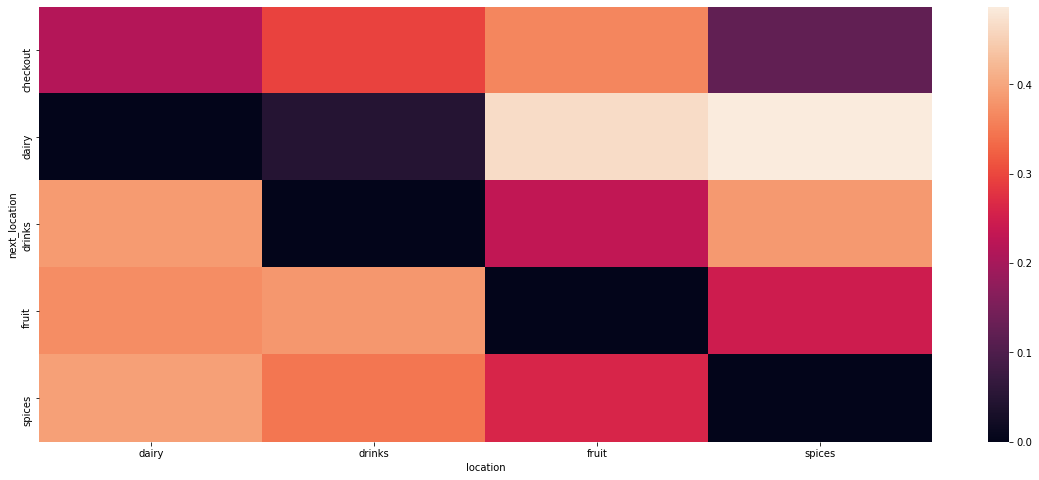

In [137]:
sns.heatmap(transition_mon)

In [138]:
# apply the calculation on weekly data

In [9]:
def df_concat(df_mon,df_tue,df_wed,df_thur,df_fri):
    df = pd.concat(
    [df_mon,df_tue,df_wed,df_thur,df_fri],
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
    df.sort_values(by=['day','time'],inplace=True)
    return df

In [10]:
df = df_concat(df_mon,df_tue,df_wed,df_thur,df_fri)

In [11]:
df['next_location']= None

In [12]:
df.shape

(24877, 7)

customerid_total=df['customerno'].unique()
for idno in customerid_total:
        df.loc[df['customerno']== idno,'next_location'] = df.loc[df['customerno']== idno,'location'].shift(-1).fillna(float('Nan'))

transition_total = pd.crosstab(df['next_location'], df['location'], normalize=0)

transition_total

In [162]:
def cal_transition(df, customerid_total):
    df['next_location']= None
    for idno in customerid_total:
        df.loc[df['customerno']== idno,'next_location'] = df.loc[df['customerno']== idno,'location'].shift(-1).fillna('checkout')
    return df
customerid_total=df['customerno'].unique()
cal_transition(df, customerid_total)

,timestamp,customerno,location,day,hour,time,next_location
0,2019-09-02 07:03:00,mon_1,dairy,2,7,07:03:00,checkout
1,2019-09-02 07:03:00,mon_2,dairy,2,7,07:03:00,checkout
2,2019-09-02 07:04:00,mon_3,dairy,2,7,07:04:00,checkout
3,2019-09-02 07:04:00,mon_4,dairy,2,7,07:04:00,checkout
4,2019-09-02 07:04:00,mon_5,spices,2,7,07:04:00,checkout
...,...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,fri_1500,dairy,6,21,21:50:00,checkout
5121,2019-09-06 21:50:00,fri_1507,checkout,6,21,21:50:00,checkout
5122,2019-09-06 21:50:00,fri_1508,checkout,6,21,21:50:00,checkout
5123,2019-09-06 21:50:00,fri_1509,drinks,6,21,21:50:00,checkout


In [163]:
df_transition = pd.crosstab(df['location'],df['next_location'],normalize=0)

In [164]:
df[df.customerno.eq('mon_6')]

,timestamp,customerno,location,day,hour,time,next_location
5,2019-09-02 07:04:00,mon_6,spices,2,7,07:04:00,dairy
10,2019-09-02 07:05:00,mon_6,dairy,2,7,07:05:00,spices
62,2019-09-02 07:17:00,mon_6,spices,2,7,07:17:00,drinks
71,2019-09-02 07:18:00,mon_6,drinks,2,7,07:18:00,spices
102,2019-09-02 07:25:00,mon_6,spices,2,7,07:25:00,dairy
104,2019-09-02 07:26:00,mon_6,dairy,2,7,07:26:00,spices
117,2019-09-02 07:27:00,mon_6,spices,2,7,07:27:00,checkout
135,2019-09-02 07:29:00,mon_6,checkout,2,7,07:29:00,checkout


In [165]:
df_transition

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


In [166]:
df_transition.to_csv('df_transition.csv',index=False)

In [167]:
df.to_csv('customer_full',index = False)

In [168]:
import random

In [169]:
population = [['dairy','checkout'],['dairy', 'drinks'],['dairy','fruit'],['dairy','spices'],['drink','checkout'],['drinks','dairy'],
              ['drinks','fruit'],['drinks','spices'],
             ['fruit','checkout'],['fruit','dairy'],['fruit','drinks'],['fruit','spices'],['spices','checkout'],['spices','dairy'],
              ['spices','drink'],['spices','fruit']]
weights=[0.391211,0.22315,0.189925,0.195713,0.537023,0.027159,0.219062,0.216756,0.499511,0.238319,0.136266,0.125904,0.251000,0.323553,0.273140,0.152307]

In [170]:
random.choices(population=population, weights=weights,k=10)

[['fruit', 'checkout'],
 ['dairy', 'spices'],
 ['dairy', 'checkout'],
 ['fruit', 'dairy'],
 ['fruit', 'dairy'],
 ['drinks', 'spices'],
 ['spices', 'dairy'],
 ['spices', 'fruit'],
 ['fruit', 'checkout'],
 ['drinks', 'spices']]

In [171]:
sum([0.251000,0.323553,0.273140,0.152307])

1.0

In [198]:
location_dict={}
for location, next_location in zip(df['location'],df['next_location']):
    
    if location in location_dict.keys():
        # if the key is already there attach the current\
        # pair to the existing key
        location_dict[location].append(next_location)
    
    else:
        location_dict[location] = [next_location]

In [199]:
location_dict.keys()

dict_keys(['dairy', 'spices', 'fruit', 'checkout', 'drinks'])

In [200]:
location_dict['dairy'][8]

'fruit'

In [201]:
all_status = list(df['location'])

In [202]:
state_init_1 = [np.random.choice(all_status)]

In [203]:
print(state_init_1)

['dairy']


In [204]:
step = 4

In [205]:

for i in range(step):    
    
    state_init_1.append(np.random.choice(location_dict[state_init[i]]))

In [206]:
state_init_1

['dairy', 'checkout', 'checkout', 'checkout', 'checkout']

In [207]:
# modelling time

In [208]:
df.head(5)

,timestamp,customerno,location,day,hour,time,next_location
0,2019-09-02 07:03:00,mon_1,dairy,2,7,07:03:00,checkout
1,2019-09-02 07:03:00,mon_2,dairy,2,7,07:03:00,checkout
2,2019-09-02 07:04:00,mon_3,dairy,2,7,07:04:00,checkout
3,2019-09-02 07:04:00,mon_4,dairy,2,7,07:04:00,checkout
4,2019-09-02 07:04:00,mon_5,spices,2,7,07:04:00,checkout


In [229]:
df_mon_1 = df.loc[df['customerno']=='mon_1']

In [230]:
df_mon_1

,timestamp,customerno,location,day,hour,time,next_location
0,2019-09-02 07:03:00,mon_1,dairy,2,7,07:03:00,checkout
8,2019-09-02 07:05:00,mon_1,checkout,2,7,07:05:00,checkout


In [237]:
df_mon_1['timestamp'].max()-df_mon_1['timestamp'].min()

Timedelta('0 days 00:02:00')

In [239]:
timedelta = []
for customerid in df['customerno'].unique():
    delta = df.loc[df['customerno']==customerid]['timestamp'].max() - df.loc[df['customerno']==customerid]['timestamp'].min()
    timedelta.append(delta)

In [241]:
customer_time = pd.DataFrame({'customer_id':df['customerno'].unique(),
                             'timedelta':timedelta})

In [247]:
customer_time['timedelta'].max()

Timedelta('0 days 00:52:00')

In [235]:
type(df['time'].min())

datetime.time

In [224]:
df_time=df.groupby(['location','timestamp'])['customerno'].count().unstack().fillna(0)

In [227]:
df_time.T

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-02 07:03:00,0.0,2.0,0.0,0.0,0.0
2019-09-02 07:04:00,0.0,2.0,0.0,1.0,3.0
2019-09-02 07:05:00,2.0,1.0,1.0,0.0,0.0
2019-09-02 07:06:00,2.0,2.0,1.0,2.0,1.0
2019-09-02 07:07:00,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...
2019-09-06 21:46:00,0.0,0.0,1.0,4.0,0.0
2019-09-06 21:47:00,2.0,1.0,0.0,1.0,0.0
2019-09-06 21:48:00,2.0,3.0,0.0,2.0,0.0


In [ ]:
df